In [45]:
import pandas as pd
import numpy as np

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [53]:
def plot_series(series):
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        layout = (3, 2)
        for i, key in enumerate(series.keys()):
            x = i % 2
            y = int((i - x) / 2)

            ts_ax = plt.subplot2grid(layout, (y, x))
            series[key].plot(ax=ts_ax, color='blue')
            ts_ax.set_title(key)

        plt.tight_layout()

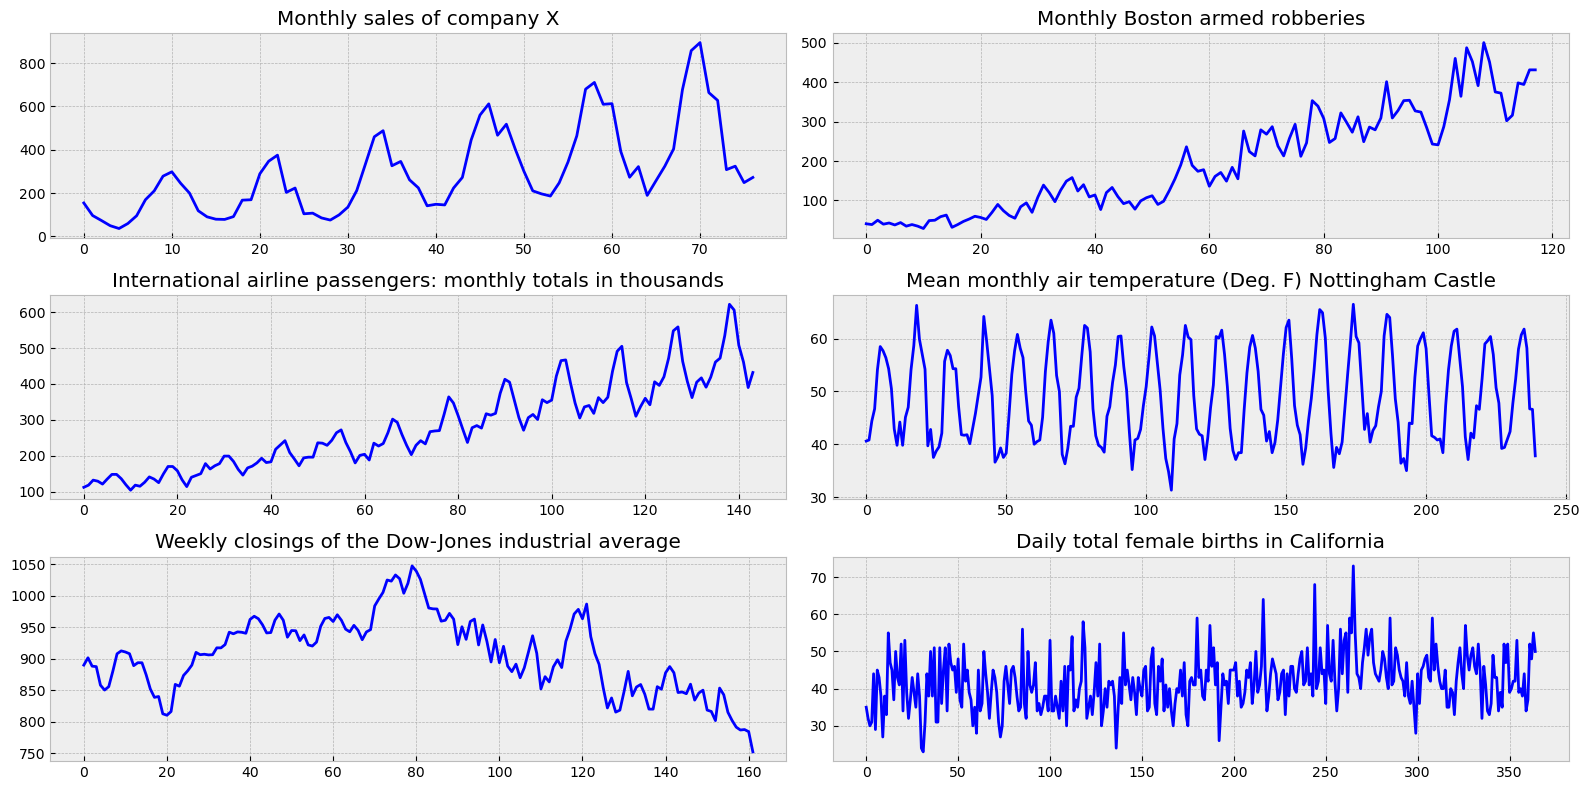

In [54]:
plot_series(all_series)

In [7]:
from statsmodels.tsa.stattools import adfuller

In [44]:
# Расчет значения p-value по тесту Дика-Фуллера

df = pd.DataFrame(all_series.keys(), columns=['Набор данных'])
df['Базовый p-value'] = df['Набор данных']
#df['1'] = adfuller(all_series[df[0]])[1]
df['Базовый p-value'] = df['Базовый p-value'].apply(lambda x: adfuller(all_series[x])[1])
df


,Набор данных,Базовый p-value
0,Monthly sales of company X,0.988889
1,Monthly Boston armed robberies,0.994278
2,International airline passengers: monthly tota...,0.991880
3,Mean monthly air temperature (Deg. F) Nottingh...,0.016989
4,Weekly closings of the Dow-Jones industrial av...,0.622455
5,Daily total female births in California,0.000052


Промежуточный вывод:
    1. Ряд Mean monthly air temperature (Deg. F) Nottingh скорее всего стационарен
    2. Все остальные ряды скорее всего не стационарны

In [62]:
import copy

In [ ]:
Преобразование №1 - логарифмирование

In [65]:
# Логарифмирование всех рядов и сохранение в новый сдловарь
all_series_log = copy.deepcopy(all_series)
for key in all_series_log.keys():
    all_series_log[key] = np.log(all_series_log[key])

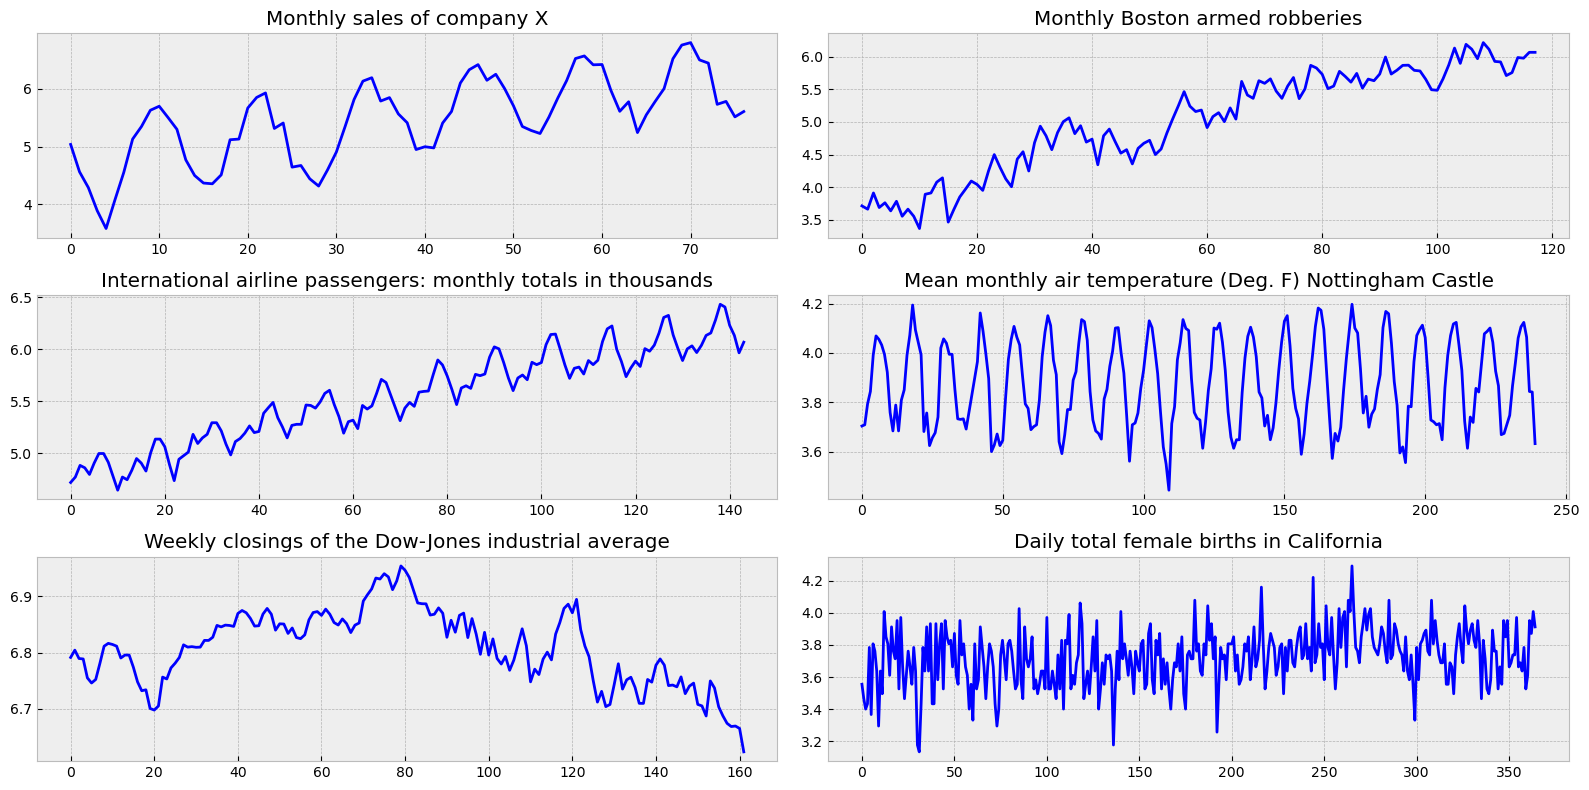

In [66]:
plot_series(all_series_log)

In [75]:
df['Полсле логарифмирования'] = df.iloc[:,0].apply(lambda x: adfuller(all_series_log[x])[1])
df

,Набор данных,Базовый p-value,Полсле логарифмирования
0,Monthly sales of company X,0.988889,0.785310
1,Monthly Boston armed robberies,0.994278,0.280833
2,International airline passengers: monthly tota...,0.991880,0.422367
3,Mean monthly air temperature (Deg. F) Nottingh...,0.016989,0.003333
4,Weekly closings of the Dow-Jones industrial av...,0.622455,0.669119
5,Daily total female births in California,0.000052,0.000359


In [ ]:
Преобразование №2 - дифференцирование

In [71]:
all_series_dif = copy.deepcopy(all_series)
for key in all_series_dif.keys():
    all_series_dif[key] = pd.Series(np.diff(all_series_dif[key]))

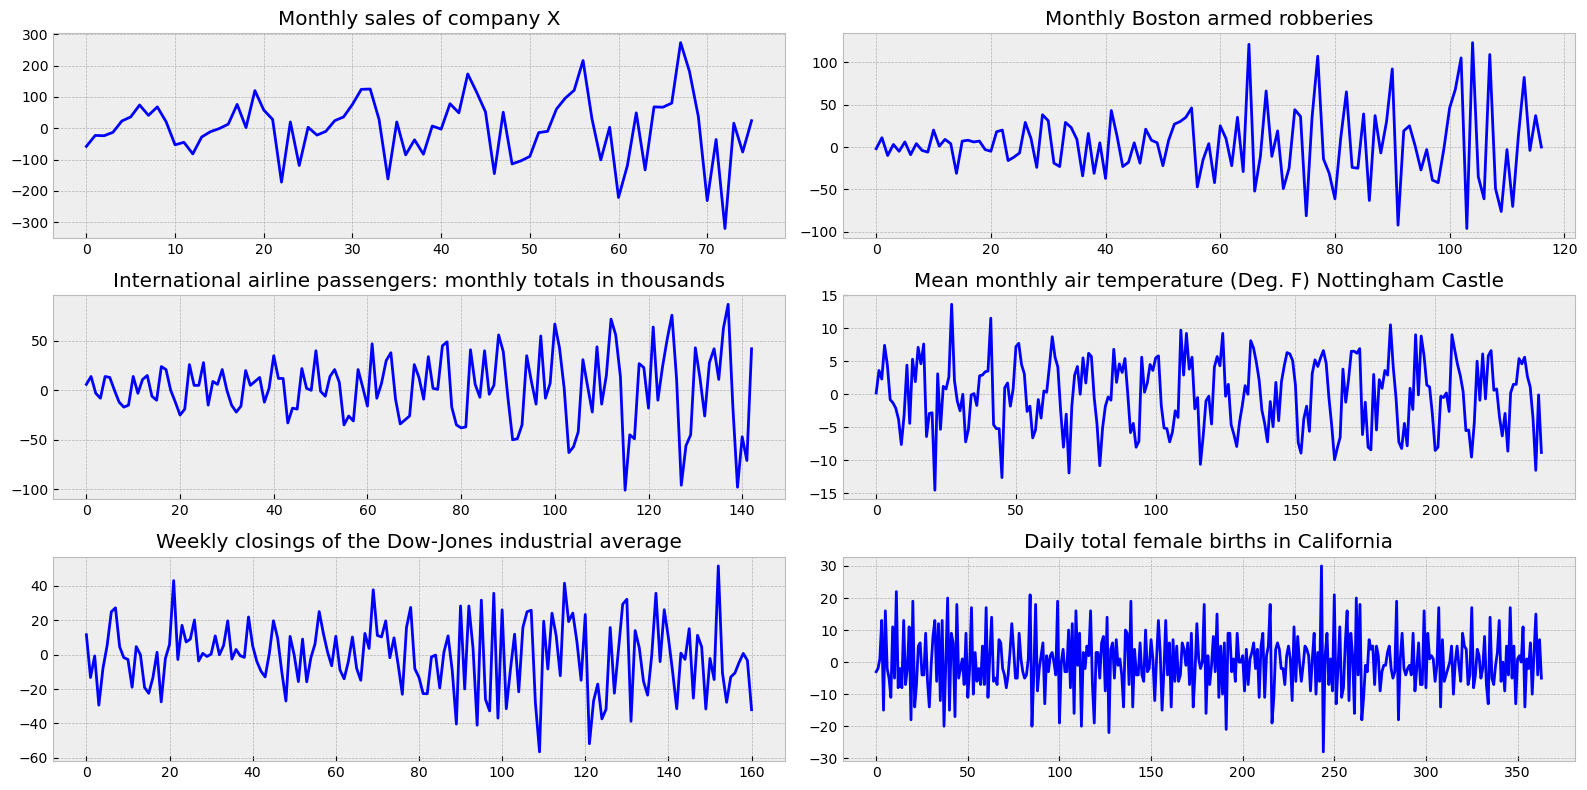

In [72]:
plot_series(all_series_dif)

In [81]:
df['Полсле дифференцирования'] = df.iloc[:,0].apply(lambda x: adfuller(all_series_dif[x])[1])
df

,Набор данных,Базовый p-value,Полсле логарифмирования,Полсле дифференцирования
0,Monthly sales of company X,0.988889,0.785310,9.550925e-02
1,Monthly Boston armed robberies,0.994278,0.280833,6.450795e-11
2,International airline passengers: monthly tota...,0.991880,0.422367,5.421329e-02
3,Mean monthly air temperature (Deg. F) Nottingh...,0.016989,0.003333,9.157883e-23
4,Weekly closings of the Dow-Jones industrial av...,0.622455,0.669119,2.407586e-24
5,Daily total female births in California,0.000052,0.000359,1.547240e-23


In [ ]:
Преобразование №3 - дифференцирование с лагом 12 (убираем сезонность)

In [82]:
all_series_dif_12 = copy.deepcopy(all_series)
for key in all_series_dif_12.keys():
    all_series_dif_12[key] = pd.Series(np.diff(all_series_dif_12[key], n=12))

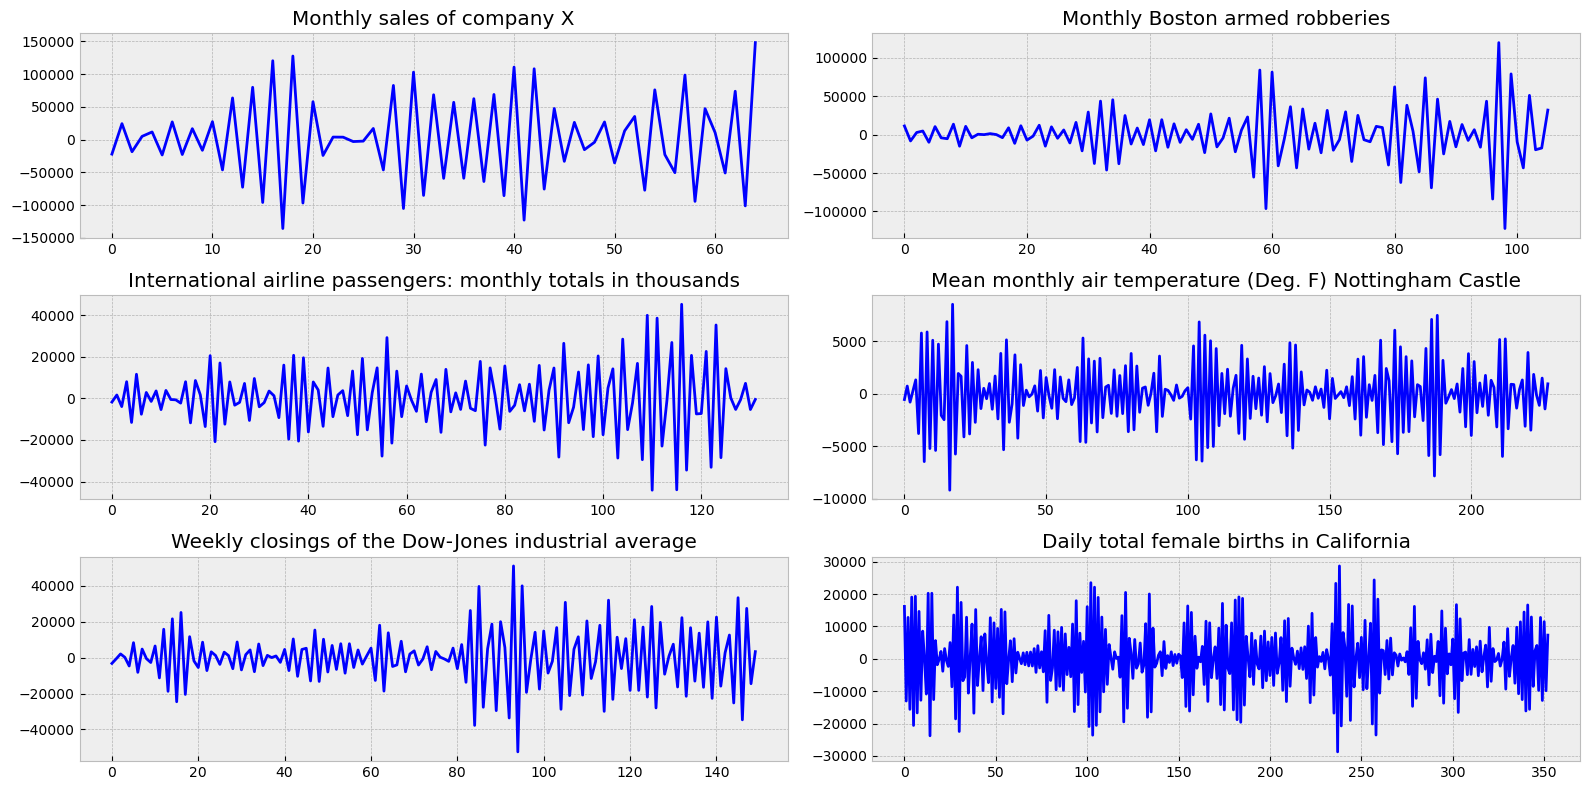

In [83]:
plot_series(all_series_dif_12)

In [84]:
df['Полсле дифференцирования лагом 12'] = df.iloc[:,0].apply(lambda x: adfuller(all_series_dif_12[x])[1])
df

,Набор данных,Базовый p-value,Полсле логарифмирования,Полсле дифференцирования,Полсле дифференцирования лагом 12
0,Monthly sales of company X,0.988889,0.785310,9.550925e-02,7.120187e-09
1,Monthly Boston armed robberies,0.994278,0.280833,6.450795e-11,1.896024e-17
2,International airline passengers: monthly tota...,0.991880,0.422367,5.421329e-02,2.980504e-29
3,Mean monthly air temperature (Deg. F) Nottingh...,0.016989,0.003333,9.157883e-23,1.388342e-29
4,Weekly closings of the Dow-Jones industrial av...,0.622455,0.669119,2.407586e-24,5.683181e-22
5,Daily total female births in California,0.000052,0.000359,1.547240e-23,0.000000e+00


In [ ]:
Итоговый результат преобразования рядов

In [88]:
#df.iloc[:,1:].round(4)
df.round(4)

,Набор данных,Базовый p-value,Полсле логарифмирования,Полсле дифференцирования,Полсле дифференцирования лагом 12
0,Monthly sales of company X,0.9889,0.7853,0.0955,0.0
1,Monthly Boston armed robberies,0.9943,0.2808,0.0000,0.0
2,International airline passengers: monthly tota...,0.9919,0.4224,0.0542,0.0
3,Mean monthly air temperature (Deg. F) Nottingh...,0.0170,0.0033,0.0000,0.0
4,Weekly closings of the Dow-Jones industrial av...,0.6225,0.6691,0.0000,0.0
5,Daily total female births in California,0.0001,0.0004,0.0000,0.0


Выводы:
1. Все ряды удалось сделать стационарными.
2. Проверка на стационарность проводилась тестом Дики Фуллера. На финальном шаге вероятность того, что ряд не является стационарным практически 0%
3. Применялись следующие преобразования:
    1. Логарифмирование
    2. Диффиринцирование (убираем тренд)
    3. Диффиринцирование с лагом 12 (убираем сезонность)



Тем не менее, графики рядов не похожи на 100% стационарные
